In [4]:
### Local imports ###
import sys
sys.path.append('../') # define relative path for local imports
from src.models.scm import SCM
from src.datasets.dataset import SCMDataset


In [2]:
from refiners.training_utils.config import BaseConfig

class SCMConfig(BaseConfig):
    path_generated_images : str
    path_garment_images : str
    training : dict




config = SCMConfig.load_from_toml("/home/daniel/work/vton/configs/config_scm.toml")

/home/daniel/.pyenv/versions/3.10.13/envs/vton/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValidationError: 3 validation errors for SCMConfig
saving_path
  Extra inputs are not permitted [type=extra_forbidden, input_value='/home/daniel/work/vton/models', input_type=str]
    For further information visit https://errors.pydantic.dev/2.6/v/extra_forbidden
wandb
  Extra inputs are not permitted [type=extra_forbidden, input_value={'mode': 'online', 'entit...n', 'name': 'tonic_cup'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.6/v/extra_forbidden
scm
  Extra inputs are not permitted [type=extra_forbidden, input_value={'img_channel': 6, 'width...ec_blk_nums': [2, 2, 2]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.6/v/extra_forbidden

In [5]:
path_generated_images = "/var/hub/VITON-HD-warped"
path_garment_images = "/var/hub/VITON-HD/test"
mode = "train"

dataset = SCMDataset(path_generated_images, path_garment_images, mode)




In [6]:
# Display different images
import PIL  
import numpy as np
import matplotlib.pyplot as plt
from refiners.fluxion.utils import tensor_to_image

def display_image(image):
    image_to_display = tensor_to_image(image.unsqueeze(0))
    plt.imshow(image_to_display)
    plt.show()

07622_00.jpg


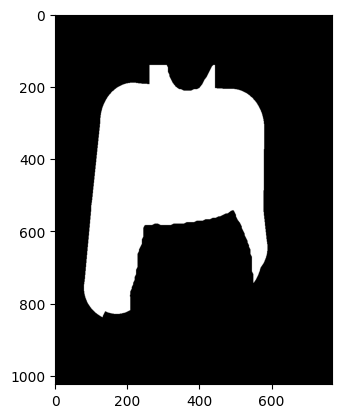

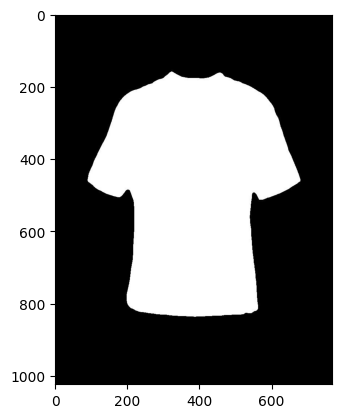

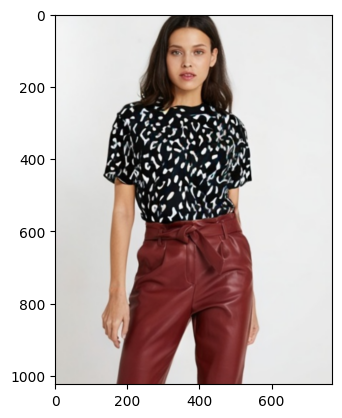

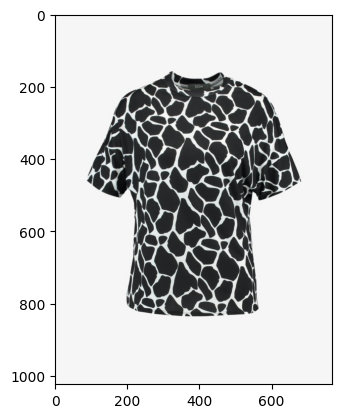

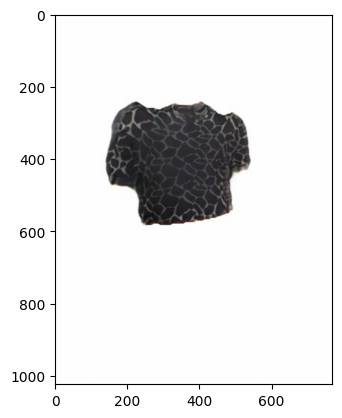

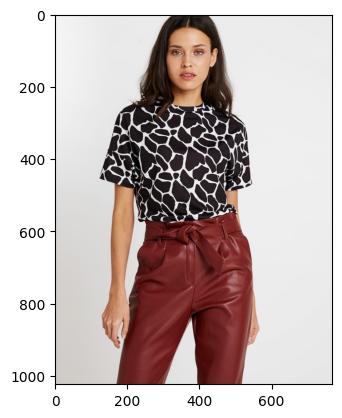

In [21]:
elemt = dataset[9]
print(elemt["file_name"])
for key in [
        "model_mask",
        "cloth_mask",
        "model_generated",
        "cloth",
        "input_warped_cloth",
        "model_real",
    ]:
    display_image(elemt[key])
    # Save image
    image_to_save = tensor_to_image(elemt[key].unsqueeze(0))
    file_name = elemt["file_name"] + "_" + key + ".png"
    image_to_save.save(file_name)



In [12]:
model = SCM()


In [13]:
import torch

batch = elemt["input_scm"].unsqueeze(0)
with torch.no_grad():
    out = model(batch)
    print(out.shape)


    

torch.Size([1, 3, 1024, 768])


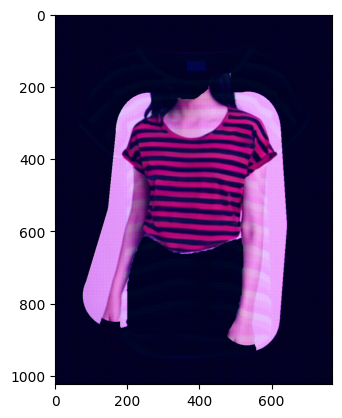

In [14]:
display_image(out[0])